#importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset

In [2]:
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,76,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for i in data.columns:
    print(i,end =" ,")

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

In [4]:
data.shape

(14294, 135)

In [5]:
cols = []
for i in data.columns:
    if data[i].isnull().sum()>150000:
        cols.append(i)

In [7]:
data_new = data.drop(cols,axis=1)

In [8]:
data_new.shape

(14294, 135)

In [9]:
data_new.fillna(0,inplace=True)

In [10]:
data_new.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
countries_with_most_terrorism = data_new.country_txt.value_counts().head(10)
countries = list(countries_with_most_terrorism.index)

Text(0.5, 1.0, 'Countries with most terrorism')

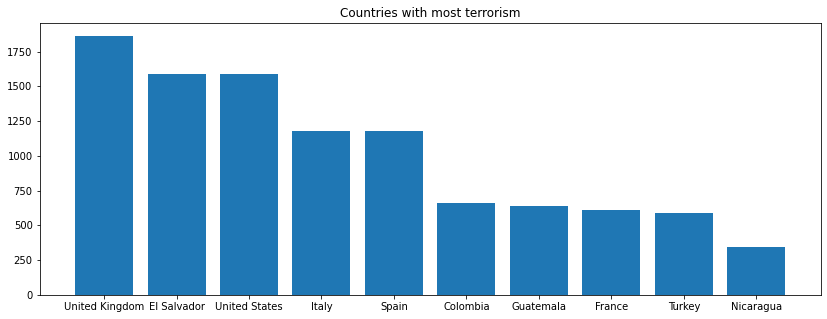

In [12]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(countries_with_most_terrorism.index,countries_with_most_terrorism.values)
plt.title('Countries with most terrorism')

In [13]:
countries


['United Kingdom',
 'El Salvador',
 'United States',
 'Italy',
 'Spain',
 'Colombia',
 'Guatemala',
 'France',
 'Turkey',
 'Nicaragua']

From the above graph it is clear that Iraq is the country with most terrorism.



In [14]:
data1 = data_new[data_new['country_txt'].isin(countries)]


In [16]:
data1.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [17]:
data1.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,1.970010e+11,1970,1,1,0,0,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0.0,0,1/1/1970: Unknown African American assailants ...,1.0,1.0,1.0,0.0,0.0,0,0.0,1.0,0.0,2.0,Armed Assault,0.0,0,0.0,0,3.0,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,...,0.0,0,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9.0,-9.0,0.0,-9.0,0
7,1.970010e+11,1970,1,2,0,0,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,1.0,1.0,1.0,1.0,2.0,Other Crime Type,0.0,1.0,0.0,3.0,Bombing/Explosion,0.0,0,0.0,0,21.0,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),22500.0,Three transformers were damaged.,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",0,Hewitt Project,-9.0,-9.0,0.0,-9.0,0
8,1.970010e+11,1970,1,2,0,0,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0.0,0,"1/2/1970: Karl Armstrong, a member of the New ...",1.0,1.0,1.0,0.0,0.0,0,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,0.0,0,0.0,0,4.0,Military,28.0,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",...,0.0,0,Firebomb consisting of gasoline,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),60000.0,"Basketball courts, weight room, swimming pool,...",0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0.0,0.0,0.0,0.0,0
9,1.970010e+11,1970,1,3,0,0,0,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,1.0,0.0,0,"1/3/1970: Karl Armstrong, a member of the New ...",1.0,1.0,1.0,0.0,0.0,0,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,0.0,0,0.0,0,2.0,Government (General),21.0,Government Building/Facility/Office,Selective Service,Selective Service Headquarters in Madison Wisc...,...,0.0,0,Poured gasoline on the floor and lit it with a...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,Minor (likely < $1 million),0.0,Slight damage,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0.0,0.0,0.0,0.0,0
10,1.970010e+11,1970,1,1,0,0,0,217,United States,1,North America,Wisconsin,Baraboo,43.468500,-89.744299,1.0,0

In [18]:
data1.iyear.value_counts().head(10)


1979    1881
1980    1854
1978    1138
1981    1108
1977    1066
1976     663
1975     554
1970     505
1972     407
1971     389
Name: iyear, dtype: int64

Text(0.5, 1.0, 'Years with most number of terrorist activity')

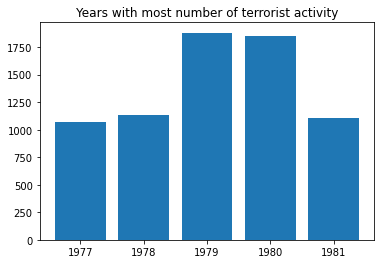

In [19]:
year = data1.iyear.value_counts().head(5)
plt.bar(year.index,year.values)
plt.title("Years with most number of terrorist activity")

2014 was recorded to have most number of terrorist attacks.

Text(0.5, 1.0, 'Type of Targets')

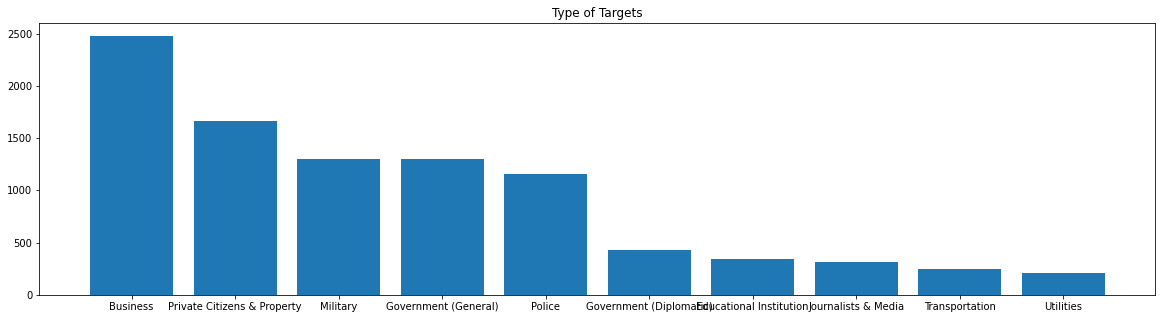

In [20]:
target = data1['targtype1_txt'].value_counts().head(10)
fig,ax = plt.subplots(figsize=(20,5))
ax.bar(target.index,target.values)
plt.title('Type of Targets')

Private Citizens and property were targeted the most.

Text(0.5, 1.0, 'Type of attacks')

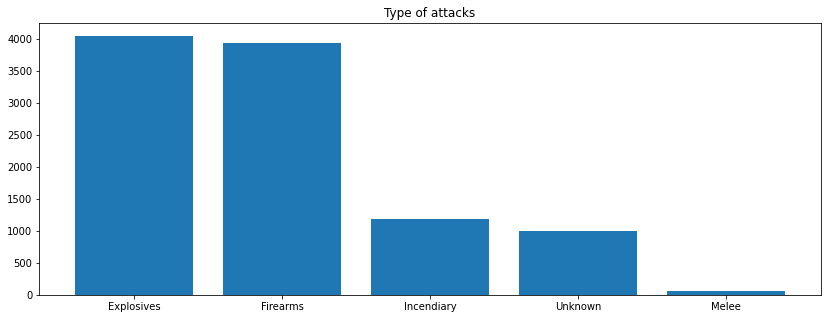

In [21]:
weapon_type = data1['weaptype1_txt'].value_counts().head(5)
fig,ax = plt.subplots(figsize=(14,5))
ax.bar(weapon_type.index,weapon_type.values)
plt.title('Type of attacks')

Explosives were used most number of times.



In [22]:
data_new.attacktype1_txt.value_counts()

Bombing/Explosion                      6040
Assassination                          2907
Armed Assault                          2438
Facility/Infrastructure Attack         1375
Hostage Taking (Kidnapping)             750
Unknown                                 430
Hostage Taking (Barricade Incident)     243
Hijacking                                82
Unarmed Assault                          28
0                                         1
Name: attacktype1_txt, dtype: int64

Text(0.5, 1.0, 'Type of attacks')

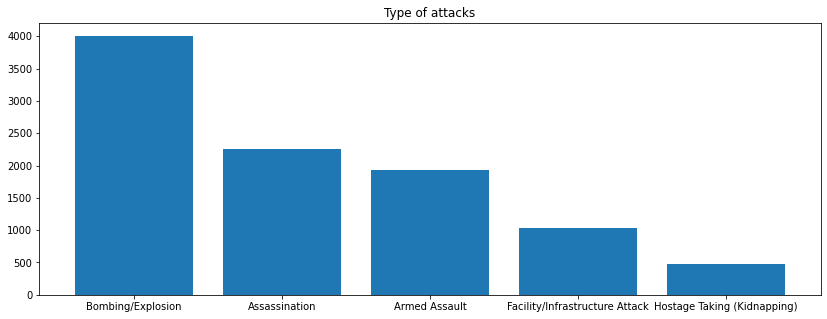

In [23]:
attack_type = data1['attacktype1_txt'].value_counts().head(5)
fig,ax = plt.subplots(figsize=(14,5))
ax.bar(attack_type.index,attack_type.values)
plt.title('Type of attacks')

From the above few graphs, we can see that most terrorist activities in 10 countries with most terrorist activities, the damage is majorly focused on civilians and usage of explosives to target masses is very high. This can be due to political problems within the country.



In [24]:
data2 = data1[data1['iyear'].isin(list(data1['iyear'].value_counts().head(5).index))]


Text(0.5, 1.0, 'Type of attacks')

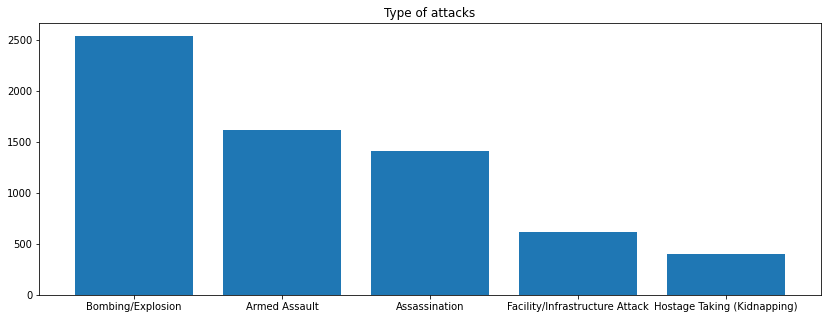

In [25]:
attack_type = data2['attacktype1_txt'].value_counts().head(5)
fig,ax = plt.subplots(figsize=(14,5))
ax.bar(attack_type.index,attack_type.values)
plt.title('Type of attacks')

Text(0.5, 1.0, 'Type of Targets')

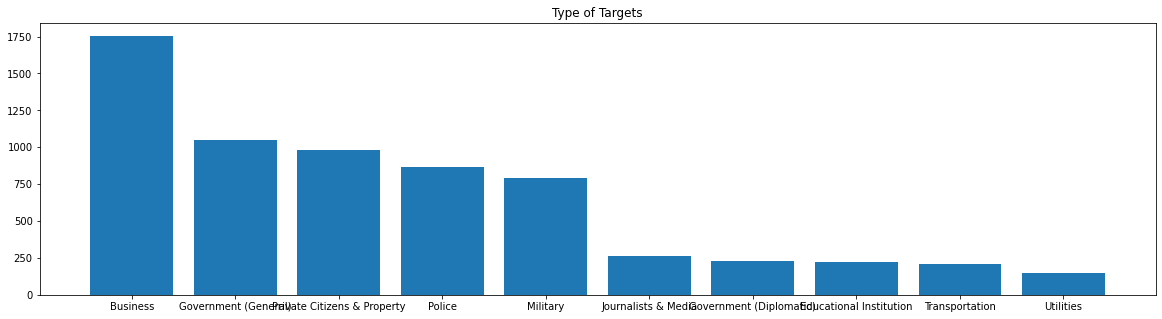

In [26]:
target = data2['targtype1_txt'].value_counts().head(10)
fig,ax = plt.subplots(figsize=(20,5))
ax.bar(target.index,target.values)
plt.title('Type of Targets')

Attacks on government officials have drastically increased.We can conclude that there might be some political issue either due to government not meeting to peoples demands or inter-country disputes.



In [27]:
cities_with_most_terrorism = data_new.city.value_counts().head(10)
cities = list(cities_with_most_terrorism.index)
cities_with_most_terrorism

Belfast           900
San Salvador      739
Unknown           648
Rome              429
New York City     347
Paris             323
Guatemala City    270
Madrid            221
Buenos Aires      209
Istanbul          186
Name: city, dtype: int64

Text(0.5, 1.0, 'Countries with most terrorism')

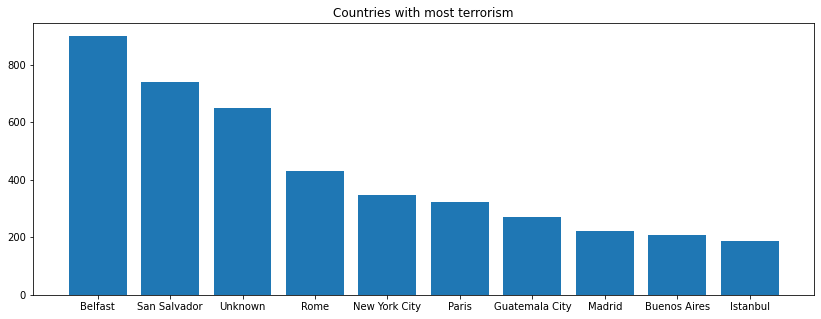

In [28]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(cities_with_most_terrorism.index,cities_with_most_terrorism.values)
plt.title('Countries with most terrorism')

In [29]:
religious_target = data_new[data_new['targtype1_txt']=='Religious Figures/Institutions']


Text(0.5, 1.0, 'Countries with most terrorism on religious figures')

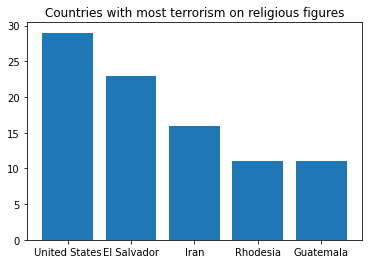

In [30]:
plt.bar(religious_target['country_txt'].value_counts().head().index,religious_target['country_txt'].value_counts().head().values)
plt.title("Countries with most terrorism on religious figures")

Iraq is the country with most terrorism due to religious reasons.